**K-medias Imágenes**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import rank,gaussian
from skimage.morphology import disk,rectangle,square
from skimage.restoration import denoise_nl_means,estimate_sigma
import scipy.ndimage as ndi
import cv2

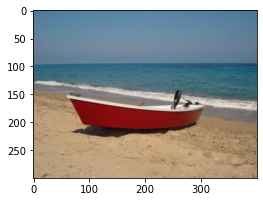

In [2]:
I = cv2.imread('bote.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
fig1=plt.figure(figsize = (4,4))
plt.imshow(I, cmap='gray',vmin=0,vmax=255)

#Paraetros y variables necesarias


In [5]:
#Paso 1: Definir el número de subgrupos
ue = {} #Unidades experimentales (Los pixeles)
k = 7   #Categorías para agrupar

#Paso 2: Definir centroides iniciales
centroides = []
for i in range(k):
    centroides.append([np.random.randint(0,255),np.random.randint(0,255),np.random.randint(0,255)])

#Extraer características de la imagen
Ir = np.reshape(I,(-1,3))   # https://numpy.org/doc/stable/reference/generated/numpy.reshape.html#numpy.reshape
Ir = Ir.astype(float)

print(centroides)
#print(Ir)
#print(Ir[0:20])


[[231, 131, 32], [19, 152, 58], [210, 206, 238], [55, 189, 101], [43, 162, 210], [114, 214, 113], [80, 83, 4]]


<BarContainer object of 7 artists>

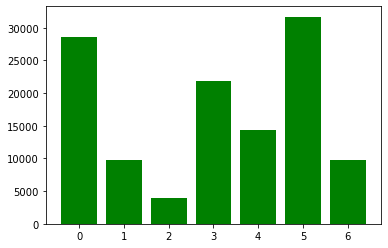

In [6]:
#Paso 3: Asignar las UE al centroide más cercano
def asignar():
    distancias = Ir.copy().tolist()  #tolist() para mejorar el rendimiento de lecturas en la memoria
    distancias = [
        [
                np.sqrt(abs(np.sum(Ir[i]-centroides[j])))
            for j in range(k)
        ]for i in range(Ir.shape[0])
    ]
    #List comprehension

    #print(distancias)
    #print(distancias[0:5])

    pertenencia = distancias.copy()
    #print(len(pertenencia))
    for i in range(len(pertenencia)):
        pertenencia[i] = distancias[i].index(min(distancias[i]))
    
    return pertenencia.copy(),distancias.copy()

pertenencia,distancias = asignar()
histPertenencia = {j:pertenencia.count(j) for j in range(k)} # https://www.datacamp.com/community/tutorials/python-dictionary-comprehension
plt.bar(histPertenencia.keys(), histPertenencia.values(), color='g')

In [7]:
#Paso 4: Calcular los nuevos centroides
def calcularNuevosCentroides():
    #Promedio pionero
    promedios = centroides.copy()
    sum = [[0 for i in range(3)] for j in range(k)]      #Vector para la suma de los  promedios

    for i in range(Ir.shape[0]):
        #print(Ir[i][0])
        #Realizar las sumas de los tres pixeles
        sum[pertenencia[i]][0] = sum[pertenencia[i]][0] + Ir[i][0]
        sum[pertenencia[i]][1] = sum[pertenencia[i]][1] + Ir[i][1]
        sum[pertenencia[i]][2] = sum[pertenencia[i]][2] + Ir[i][2]
        
    for j in range(len(promedios)):
        pixelCount = pertenencia.count(j)
        #Promediar para los tres pixeles
        promedios[j][0] = sum[j][0] / pixelCount
        promedios[j][1] = sum[j][1] / pixelCount
        promedios[j][2] = sum[j][2] / pixelCount
    
    #print("PROMEDIOS\n",promedios)
    return promedios
    

centroides = calcularNuevosCentroides()


In [8]:
#Repetir la secuencia
maxPasos = 10
for paso in range(maxPasos):
    pertenencia,distancias = asignar()
    centroides = calcularNuevosCentroides()
    print(centroides) 

[[108.65539175086964, 129.31310253437138, 144.90154050024847], [55.504186936757314, 99.23997128957652, 115.44541031980222], [214.85416666666666, 206.22766064257027, 197.53062248995985], [94.07479341761425, 115.03679638392542, 121.66975068860795], [131.68629504450897, 140.14042938068263, 143.9108392440615], [190.68492279424754, 161.39687643546165, 127.37079961838805], [103.0941475826972, 20.475114503816794, 18.407226463104326]]
[[108.66497380347786, 128.81051718041851, 143.91289254604482], [55.91495398773006, 99.88703987730061, 116.03888036809816], [215.18087000763165, 206.5436275756805, 197.83948104807936], [93.37362455530736, 114.5656490444279, 120.88061553735419], [132.70845285048404, 140.3357386159914, 143.29333990677662], [190.994171101698, 161.73733753303645, 127.7329930125629], [102.92897555061629, 20.78672459082643, 18.723782582339865]]
[[108.41053605658009, 128.4578293343909, 143.4877718289378], [55.9026113671275, 99.93410138248848, 116.10376344086022], [215.32864090094702, 206

<BarContainer object of 7 artists>

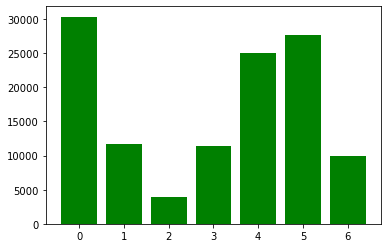

In [9]:
#Histograma para verificar el progreso
histPertenencia = {j:pertenencia.count(j) for j in range(k)} # https://www.datacamp.com/community/tutorials/python-dictionary-comprehension
plt.bar(histPertenencia.keys(), histPertenencia.values(), color='g')

Text(0.5, 1.0, 'Imagen en 7 clusters')

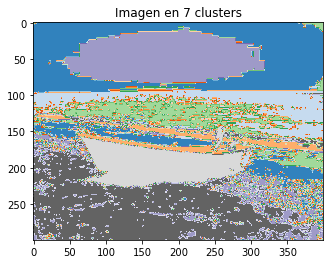

In [10]:
#Visualizar la imagen en clusters
mascaraDePertenencia = np.reshape(pertenencia,(I.shape[0],I.shape[1]))
#print(mascaraDePertenencia)
#https://matplotlib.org/3.5.1/tutorials/colors/colormaps.html#sequential
plt.imshow(mascaraDePertenencia, cmap='tab20c',vmin=0,vmax=k-1)
plt.title("Imagen en "+str(k)+" clusters")
